In [2]:
pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 493.7 kB/s eta 0:00:16
   -- ------------------------------------- 0.5/8.1 MB 493.7 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.1 MB 516.5 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 516.5 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 516.5 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/8.1 MB 453.5 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 453.5 kB/s eta 0:00:16
   ------ --------------------------------- 1.3/8.1 MB 479.5 kB/s eta 0:00:15
   ------ ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.3
    Uninstalling pip-21.2.3:
      Successfully uninstalled pip-21.2.3
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ishvi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install pandas

  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ishvi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'OnlineRetail.csv')

# Check structure
print(df.shape)
print(df.head())
print(df.info())
print(df.columns)  # Crucial step to confirm column names

# Drop rows without customer IDs
df = df.dropna(subset=["CustomerID"])

# Create Amount column
df["Amount"] = df["Quantity"] * df["UnitPrice"]

# Remove cancelled (InvoiceNo starting with 'C') and negative amounts
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df = df[df["Amount"] > 0]

print("Cleaned dataset:", df.shape)



(541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -

In [4]:
%pip install datetime


   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   ---------------------------------------- 0/2 [zope.interface]
   -------------------- ------------------- 1/2 [datetime]
   ---------------------------------------- 2/2 [datetime]

Note: you may need to restart the kernel to use updated packages.


In [6]:
import datetime as dt

# Reference date
snapshot_date = dt.datetime(2011, 12, 10)

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], dayfirst=True)

# Aggregate RFM metrics
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "Amount": "sum"          # Monetary
})

# Rename columns
rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "Amount": "Monetary"
}, inplace=True)

print(rfm.head())



            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          18          1   1757.55
12350.0         310          1    334.40


In [9]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.9 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/8.9 MB 2.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/8.9 MB 2.2 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.9 MB 1.5 MB/s eta 0:00:05
   --------- ------------------------------ 2.1/8.9 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.9 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.9 MB 1.6 MB/s eta 0:00:05
   ----------- ---------------------------- 2.6/8.9 MB 1.3 MB/s eta 0:00:05
   ----------- ---------------------------- 2.6/8.9 MB 1.3 MB/s eta 0:00:05
   ------------ --------------------------- 2.9/8.9 MB 1.2 MB/s eta 0:00:06
   -------------- --------

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
rfm_scaled = scaler.fit_transform(rfm)

# Convert scaled array back to DataFrame for readability
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

print(rfm_scaled.head())


             Recency  Frequency  Monetary
CustomerID                               
12346.0     2.329388  -0.425097  8.358668
12347.0    -0.900588   0.354417  0.250966
12348.0    -0.170593  -0.035340 -0.028596
12349.0    -0.740589  -0.425097 -0.033012
12350.0     2.179389  -0.425097 -0.191347


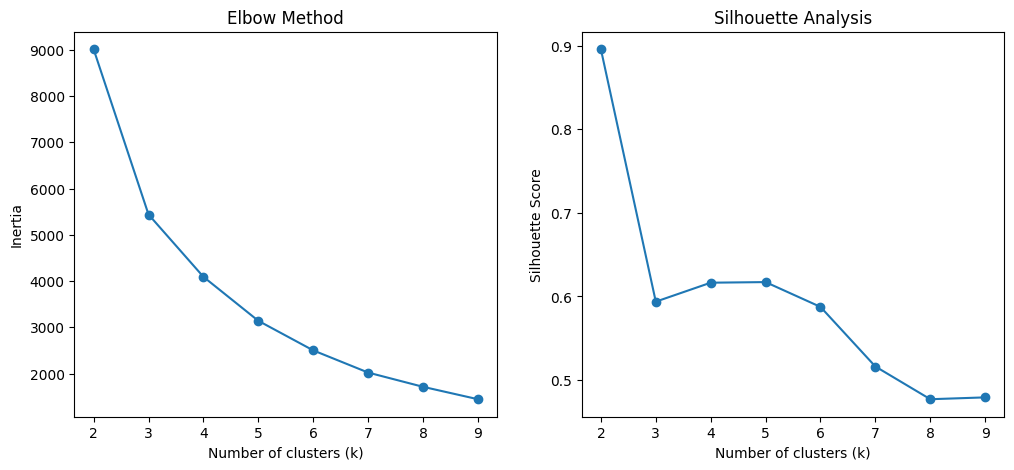

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(2, 10)

inertia = []
silhouette = []

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = model.fit_predict(rfm_scaled)
    
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, labels))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()


In [13]:
from sklearn.cluster import KMeans

# Final number of clusters
final_k = 4

# Initialize and fit the model
kmeans = KMeans(n_clusters=final_k, n_init=10, random_state=42)
rfm["Segment"] = kmeans.fit_predict(rfm_scaled)

# Check how many customers fall into each segment
print(rfm["Segment"].value_counts())

# Mean RFM values per cluster
segment_summary = rfm.groupby("Segment").mean().round(1)
print(segment_summary)



Segment
0    3060
1    1061
3     204
2      13
Name: count, dtype: int64
         Recency  Frequency  Monetary
Segment                              
0           43.4        3.7    1358.2
1          248.2        1.6     478.2
2            6.6       82.5  127338.3
3           15.0       22.3   12709.1


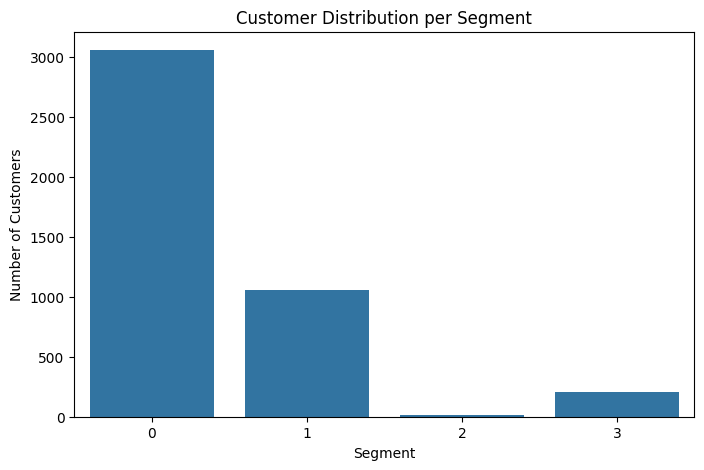

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="Segment", data=rfm)
plt.title("Customer Distribution per Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


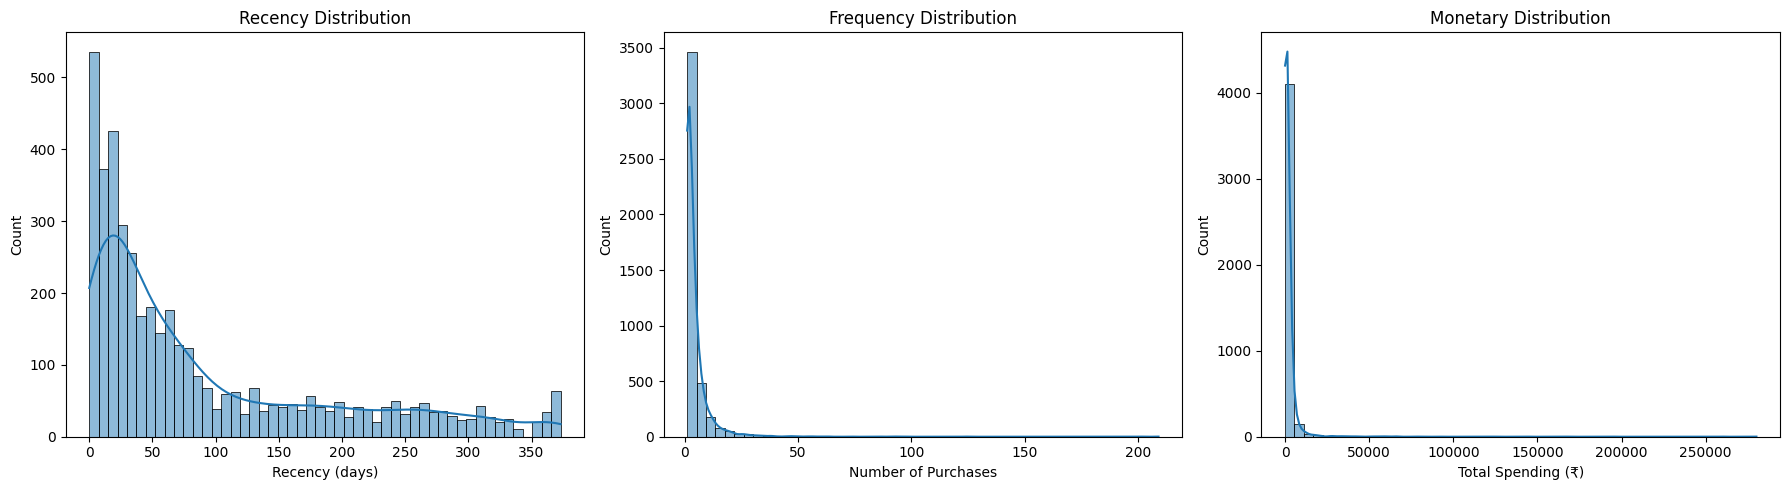

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

# Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm["Recency"], bins=50, kde=True)
plt.title("Recency Distribution")
plt.xlabel("Recency (days)")

# Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm["Frequency"], bins=50, kde=True)
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")

# Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm["Monetary"], bins=50, kde=True)
plt.title("Monetary Distribution")
plt.xlabel("Total Spending (₹)")

plt.tight_layout()
plt.show()


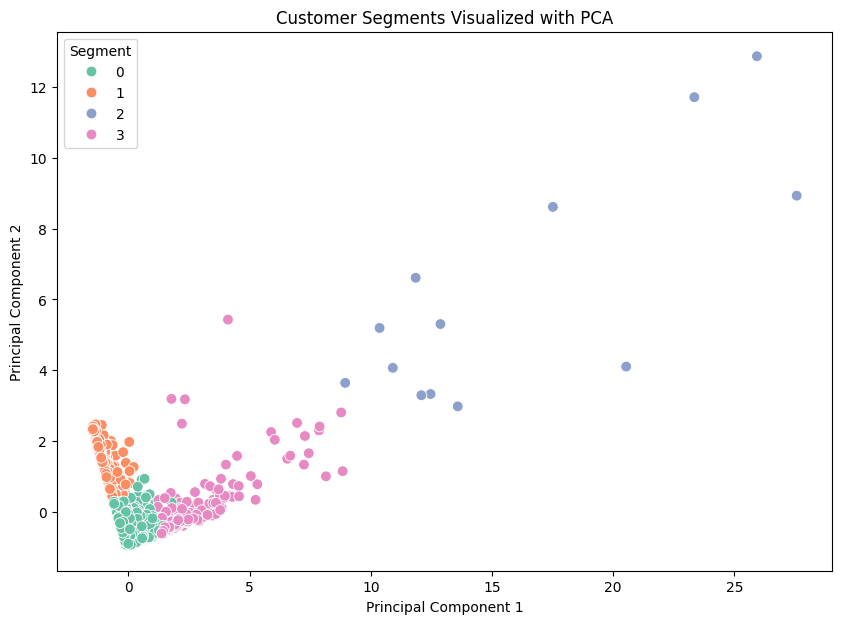

In [16]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
rfm_pca = pca.fit_transform(rfm_scaled)

# Add PCA components to dataframe
rfm["PCA1"] = rfm_pca[:, 0]
rfm["PCA2"] = rfm_pca[:, 1]

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(x="PCA1", y="PCA2", hue="Segment", data=rfm, palette="Set2", s=60)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Segment")
plt.show()
